<a href="https://colab.research.google.com/github/ruraul/fundamentos_neuronales/blob/main/primera_red_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [3]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov = 0.1,
                        n_samples = N,
                        n_features =2,
                        n_classes = 2,
                        shuffle= True,
                        random_state = None
                        )
X,Y = gaussian_quantiles

In [4]:
Y = Y[:, np.newaxis]

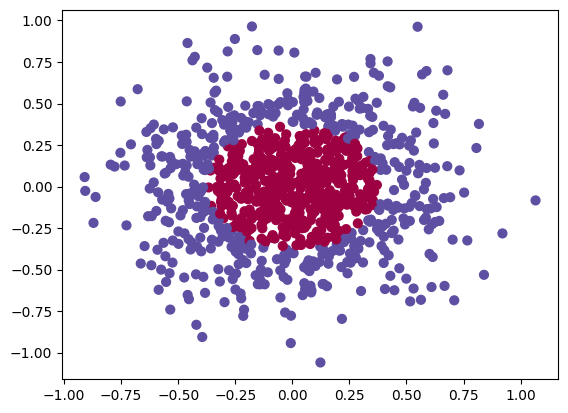

In [5]:
plt.scatter(X[:,0],X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

fUNCIONES DE ACTIVACION

In [6]:
def sigmoid(X, derivate = False):
  if derivate:
    return np.exp(-X)/((np.exp(-X)+1)**2)
  else:
    return 1/(1+np.exp(-X))

def relu(X, derivate = False):
  if derivate:
    X[X<=0]=0
    X[X>=0]=1
    return X
  else:
    return np.maximum(0,X)
### posiblemente tengo un error aqui es por las "x"

FUNCION DE PERDIDA

In [7]:
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

In [8]:
def inicializar_parametros_deep(layers_dim):
  parameters = {}
  L =len(layers_dim)
  for l in range(0,L-1):
    parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]) * 2) -1
    parameters['b'+str(l+1)] = (np.random.rand(1, layers_dim[l+1]) * 2) -1
  return parameters 

In [9]:
layer_dims = [2,4,8,1]
params = inicializar_parametros_deep(layer_dims)

In [10]:
params

{'W1': array([[-0.70995775, -0.73234365, -0.86828201, -0.58067889],
        [ 0.32264097, -0.29278521,  0.75449761,  0.81574388]]),
 'b1': array([[-0.23787513, -0.53204226,  0.77616845, -0.01606372]]),
 'W2': array([[ 0.86177546, -0.18111964, -0.95425504, -0.52873402, -0.02908551,
         -0.19317393,  0.03041497,  0.05381558],
        [-0.83771405, -0.25866978, -0.48424491, -0.90870939, -0.06402679,
         -0.35435032, -0.40032073, -0.69256988],
        [ 0.21174493, -0.902373  , -0.32595736, -0.79952772,  0.70044626,
          0.1556077 , -0.43220774,  0.24443658],
        [ 0.83903713, -0.92239397,  0.4976256 ,  0.19796173, -0.92779262,
          0.4354279 , -0.69960118, -0.92259884]]),
 'b2': array([[ 0.79979528,  0.75481301,  0.31836675, -0.28153851,  0.56499394,
          0.35217524,  0.85883383,  0.52718981]]),
 'W3': array([[-0.33880966],
        [-0.68326566],
        [ 0.73753718],
        [ 0.778687  ],
        [ 0.30546065],
        [-0.62088546],
        [ 0.6611099 ],


In [11]:
params['W1'].shape

(2, 4)

In [13]:
np.matmul(X,params['W1']).shape

(1000, 4)

In [15]:
X@params['W1']

array([[-0.08241519,  0.28280167, -0.31239767, -0.39186532],
       [-0.40355777, -0.33983399, -0.5375339 , -0.39750917],
       [ 0.14678623,  0.35182748,  0.06422323, -0.05673083],
       ...,
       [ 0.20505027,  0.15256418,  0.28469227,  0.21971428],
       [ 0.15156404,  0.04859214,  0.24735248,  0.21901442],
       [ 0.48259477,  0.41811073,  0.63606766,  0.46502304]])

In [16]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

In [29]:
layer_dims =[2, 4, 8, 1]
params = inicializar_parametros_deep(layer_dims)
errors = []
for _ in range(90000):
    output = train(X,0.0001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))
        

0.2590610917398554
0.2578917191796705
0.25677096109706676
0.2556998326387714
0.25467413891927376
0.25368465920304667
0.25273604791190246
0.25183524920104283
0.2509739974191732
0.2501375382114317
0.2492844044219321
0.24844520255186217
0.24761182176964872
0.24671185899289616
0.2457386364927928
0.24471333626516742
0.2436275174423946
0.24246143853497687
0.24118681996137786
0.23979545931145346
0.23830966807232487
0.2366666788490646
0.23486414560599247
0.23294013752054743
0.2309553695549197
0.2289278113082804
0.22689283231676166
0.22490087017582153
0.22297372887757633
0.22114978936118462
0.21942350725534532
0.2177946248295078
0.21626791425586045
0.21484421267847034
0.2135173774887909
0.21228213649688069
0.21113080124511427
0.2100551465654193
0.20904849169798642
0.2081033757934071
0.20721224812568617
0.2063684258308565
0.20556556771514375
0.2047978533667134
0.20406203508902132
0.2033541132467712
0.2026708482697006
0.20200865328056414
0.20136568016003542
0.20073873551503982
0.20012632788453272

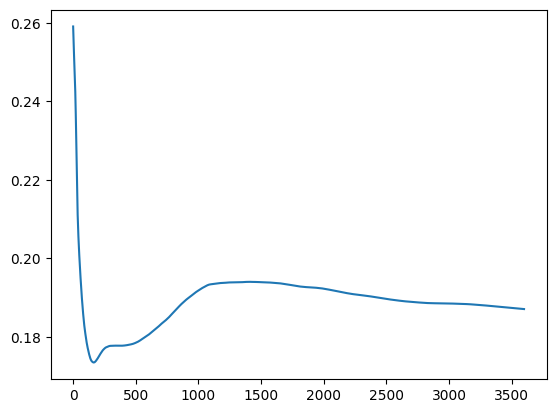

In [30]:
plt.plot(errors)

In [32]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)

In [26]:
y = np.where(y >= 0.5, 1, 0)

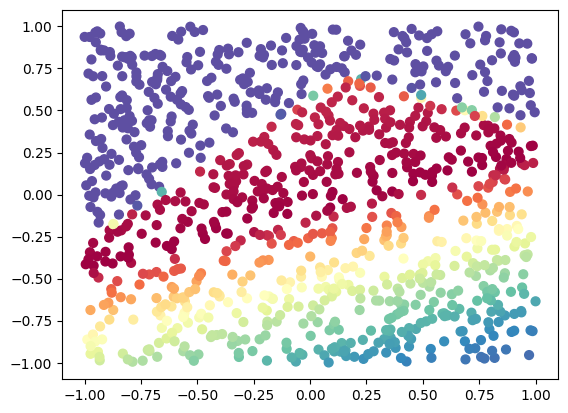

In [33]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);